In [10]:
ModelsDir = '/home/kate/Research/Property/Models/'
ModelName='regression_tmp'

In [11]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import math

In [12]:
from sklearn.metrics import mean_absolute_error
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mae', mean_absolute_error(preds, labels)

In [13]:
data = pd.read_csv('/home/kate/Research/Property/Data/EDA_log_Severity_FI_dataset.csv', error_bad_lines=False, index_col=False)

In [14]:
featureset  = [
 'stories', 
 'units', 
 'multipolicyind', 
 'functionalreplacementcost', 
 'landlordind', 
 'burglaryalarmtype', 
 'propertymanager', 
 'gatedcommunityind', 
 'replacementcostdwellingind', 
 'equipmentbreakdown', 
 'cova_deductible', 
 'water_risk_sev_3_blk', 
 'fixture_leak_3_blk', 
 'rep_cost_3_blk', 
 'sqft', 
 'waterded', 
 'constructioncd_encd', 
 'multipolicyindumbrella', 
 'usagetype_encd', 
 'homegardcreditind', 
 'rentersinsurance', 
 'waterdetectiondevice', 
 'safeguardplusind', 
 'deadboltind', 
 'replacementvalueind', 
 'numberoffamilies', 
 'water_risk_fre_3_blk', 
 'pipe_froze_3_blk', 
 'ustructure_fail_3_blk', 
 'customer_cnt_active_policies_binned', 
 'ecy', 
 'yearbuilt', 
 'roofcd_encd', 
 'occupancy_encd', 
 'protectionclass', 
 'fire_risk_model_score', 
 'earthquakeumbrellaind', 
 'ordinanceorlawpct', 
 'sprinklersystem', 
 'firealarmtype', 
 'neighborhoodcrimewatchind', 
 'kitchenfireextinguisherind', 
 'poolind', 
 'serviceline', 
 'cova_limit', 
 'water_risk_3_blk', 
 'appl_fail_3_blk', 
 'plumb_leak_3_blk', 
 'waterh_fail_3_blk'
]

In [15]:
target_column = 'log_cova_il_nc_water' 
prediction_column = 'pred'

In [16]:
X=data[featureset]
y=data[target_column]
Dtrain = xgb.DMatrix(X.values,y)

In [17]:
nrounds = 600
esr=100
xgb_params = {
    'seed': 42,
    'eta': 0.01,
    'colsample_bytree': 0.9,
    'silent': 1,
    'subsample': 0.9,
    'objective': 'reg:linear',
    'eval_metric':'mae',
    'max_depth': 6,
    'gamma': 0.4,
    'min_child_weight': 4
}

In [18]:
xgb_model = xgb.train(xgb_params, Dtrain, nrounds, feval=evalerror)
xgb_model_file='%s%s.model'%(ModelsDir,ModelName)
pickle.dump(xgb_model, open(xgb_model_file, 'wb'))

In [19]:
data[prediction_column]=  xgb_model.predict(Dtrain, ntree_limit=xgb_model.best_ntree_limit+50)  

In [20]:
fmap_filename='%s/%s.fmap'%(ModelsDir,ModelName)
outfile = open(fmap_filename, 'w')
for i, feat in enumerate(featureset):
    outfile.write('{0}\t{1}\tq\n'.format(i, feat))
outfile.close()

In [21]:
#feature importance
feat_imp = pd.Series(xgb_model.get_score(fmap=fmap_filename,importance_type='weight')).to_frame()
feat_imp.columns=['Weight']
feat_imp = feat_imp.join(pd.Series(xgb_model.get_score(fmap=fmap_filename,importance_type='gain')).to_frame())
feat_imp.columns=['Weight','Gain']
feat_imp = feat_imp.join(pd.Series(xgb_model.get_score(fmap=fmap_filename,importance_type='cover')).to_frame())
feat_imp.columns=['Weight','Gain','Cover']
#feat_imp['fold']=i
feat_imp['FeatureName'] = feat_imp.index
feat_imp['ModelName'] = ModelName
#feat_imp_all = feat_imp_all.append(feat_imp, ignore_index=True)
feat_imp.sort_values(by=['Gain'], ascending=False)

,Weight,Gain,Cover,FeatureName,ModelName
waterded,64,7.763599,1629.125000,waterded,regression_tmp
cova_deductible,527,7.512366,4026.474383,cova_deductible,regression_tmp
earthquakeumbrellaind,8,7.218238,3671.250000,earthquakeumbrellaind,regression_tmp
deadboltind,160,6.479719,2014.087500,deadboltind,regression_tmp
fire_risk_model_score,390,6.449335,2718.056410,fire_risk_model_score,regression_tmp
neighborhoodcrimewatchind,128,6.311047,3315.984375,neighborhoodcrimewatchind,regression_tmp
occupancy_encd,171,6.287180,2382.964912,occupancy_encd,regression_tmp
usagetype_encd,243,6.084383,2232.707819,usagetype_encd,regression_tmp
poolind,65,5.985599,672.276923,poolind,regression_tmp
pipe_froze_3_blk,489,5.919883,2503.404908,pipe_froze_3_blk,regression_tmp


In [22]:
# from https://xiaoxiaowang87.github.io/monotonicity_constraint/
def partial_dependency(model, X,  feature):

    """
    Calculate the dependency (or partial dependency) of a response variable on a predictor (or multiple predictors)
    1. Sample a grid of values of a predictor for numeric continuous or all unique values for categorical or discrete continuous.
    2. For each value, replace every row of that predictor with this value, calculate the average prediction.
    """

    X_temp = X.copy()
    
    if feature in ['sqft','yearbuilt','water_risk_sev_3_blk', 'water_risk_3_blk','water_risk_fre_3_blk','ecy']:
        # continuous
        grid = np.linspace(np.percentile(X_temp[feature], 0.1),
                       np.percentile(X_temp[feature], 99.5),
                       50)
    else:
        #categorical
        grid = X_temp[feature].unique()

    y_pred = np.zeros(len(grid))

    for i, val in enumerate(grid):
        X_temp[feature] = val
        d_temp=xgb.DMatrix(X_temp.values)
        y_pred[i] = np.average(model.predict(d_temp,ntree_limit=model.best_ntree_limit+50))


    return grid, y_pred

In [23]:
pd_features = ['waterded',
'cova_deductible',
'earthquakeumbrellaind',
'deadboltind',
'fire_risk_model_score',
'neighborhoodcrimewatchind',
'occupancy_encd',
'usagetype_encd',
'poolind',
'pipe_froze_3_blk',
'roofcd_encd',
'water_risk_3_blk',
'cova_limit',
'water_risk_sev_3_blk',
'safeguardplusind',
'units',
'homegardcreditind',
'water_risk_fre_3_blk',
'rentersinsurance',
'waterh_fail_3_blk',
'serviceline',
'ordinanceorlawpct',
'sqft',
'rep_cost_3_blk',
'yearbuilt',
'equipmentbreakdown',
'ecy',
'protectionclass',
'plumb_leak_3_blk',
'appl_fail_3_blk',
'customer_cnt_active_policies_binned',
'landlordind',
'sprinklersystem',
'ustructure_fail_3_blk',
'multipolicyind',
'constructioncd_encd',
'multipolicyindumbrella',
'fixture_leak_3_blk',
'replacementvalueind',
'replacementcostdwellingind',
'propertymanager',
'numberoffamilies',
'stories',
'gatedcommunityind',
'burglaryalarmtype',
'firealarmtype',
'kitchenfireextinguisherind'
]

In [24]:
all_fm_pd = pd.DataFrame()
for f in pd_features:
    print('Processing:%s'%f)
    grid, y_pred = partial_dependency(xgb_model,X,f)
    fm_pd=pd.concat([pd.Series(grid), pd.Series(y_pred)], axis=1)
    fm_pd.columns=['value','pd']
    fm_pd['feature']=f
    all_fm_pd=all_fm_pd.append(fm_pd)
    all_fm_pd.to_csv('%s%s_PartialDependency.csv'%(ModelsDir,ModelName),header=True,index=False);

Processing:waterded
Processing:cova_deductible
Processing:earthquakeumbrellaind
Processing:deadboltind
Processing:fire_risk_model_score
Processing:neighborhoodcrimewatchind
Processing:occupancy_encd
Processing:usagetype_encd
Processing:poolind
Processing:pipe_froze_3_blk
Processing:roofcd_encd
Processing:water_risk_3_blk
Processing:cova_limit
Processing:water_risk_sev_3_blk
Processing:safeguardplusind
Processing:units
Processing:homegardcreditind
Processing:water_risk_fre_3_blk
Processing:rentersinsurance
Processing:waterh_fail_3_blk
Processing:serviceline
Processing:ordinanceorlawpct
Processing:sqft
Processing:rep_cost_3_blk
Processing:yearbuilt
Processing:equipmentbreakdown
Processing:ecy
Processing:protectionclass
Processing:plumb_leak_3_blk
Processing:appl_fail_3_blk
Processing:customer_cnt_active_policies_binned
Processing:landlordind
Processing:sprinklersystem
Processing:ustructure_fail_3_blk
Processing:multipolicyind
Processing:constructioncd_encd
Processing:multipolicyindumbrel

In [25]:
%matplotlib inline

/home/kate/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


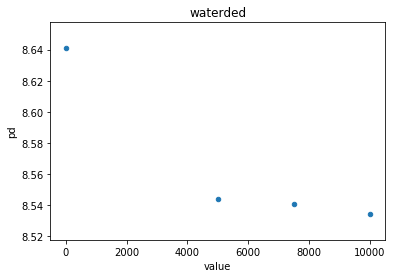

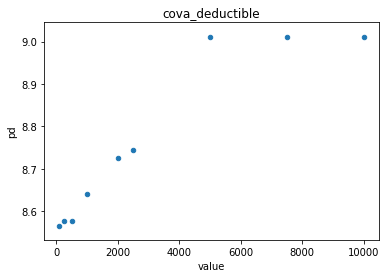

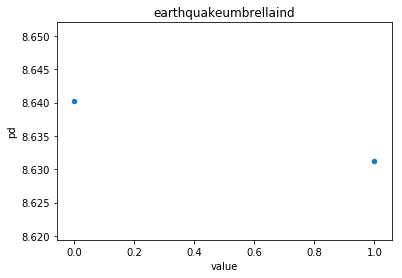

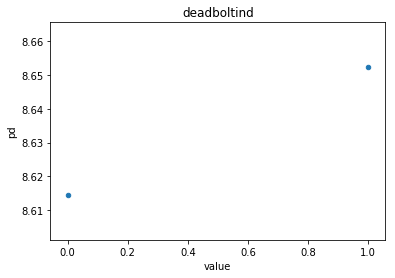

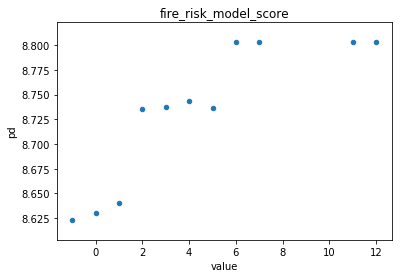

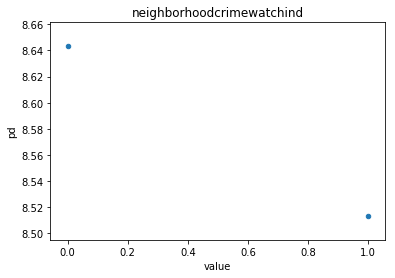

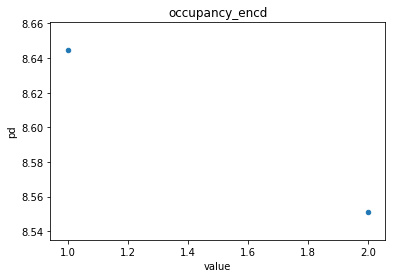

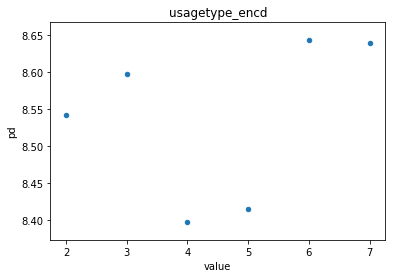

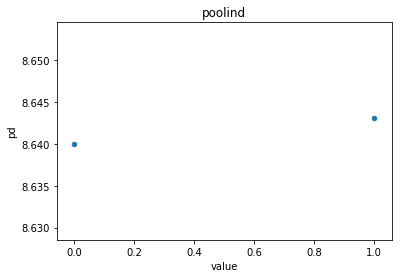

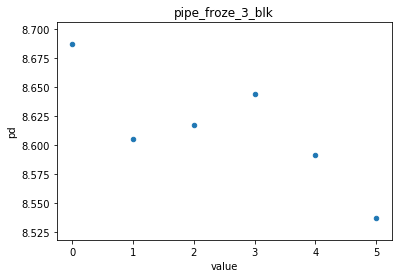

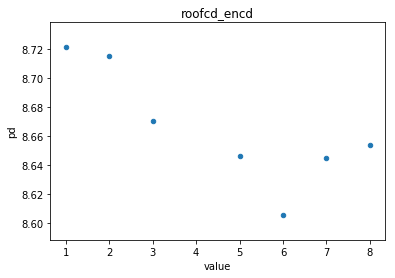

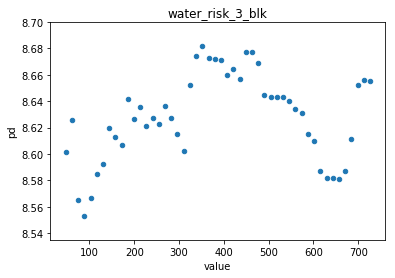

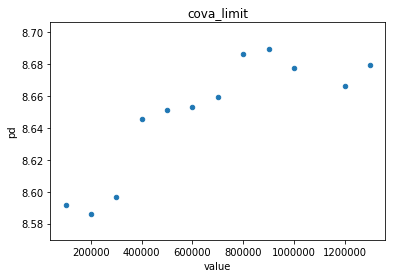

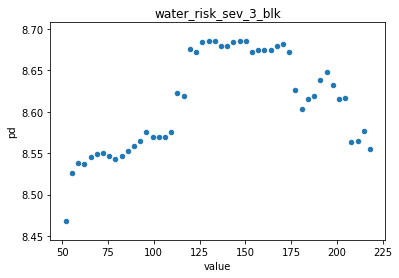

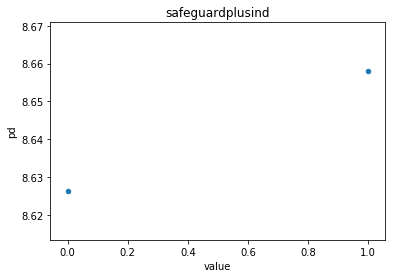

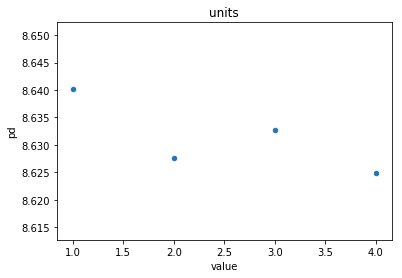

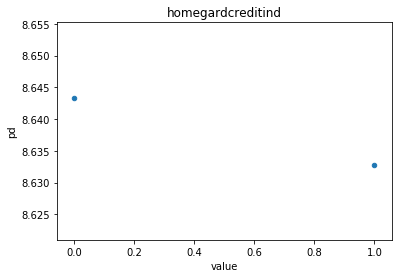

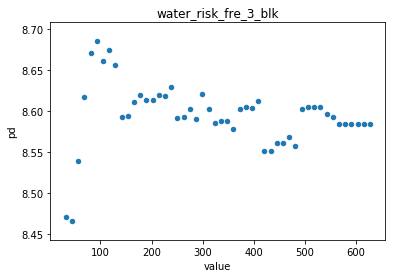

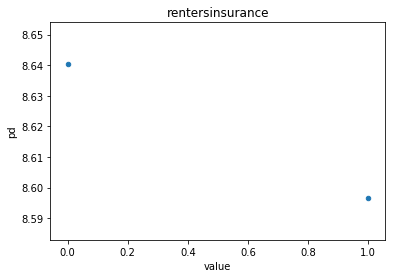

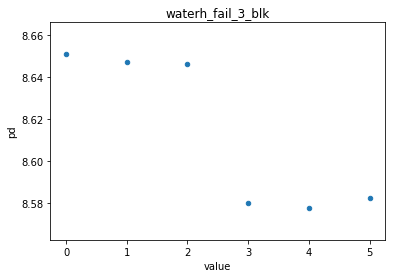

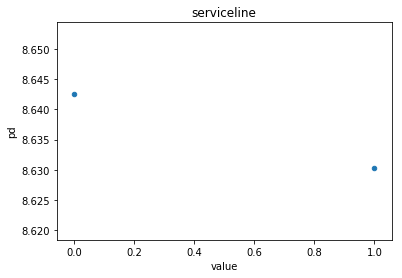

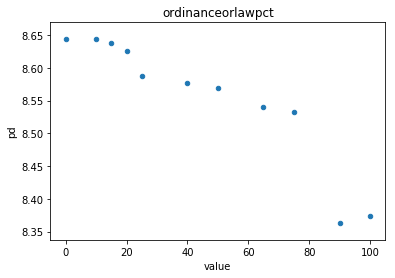

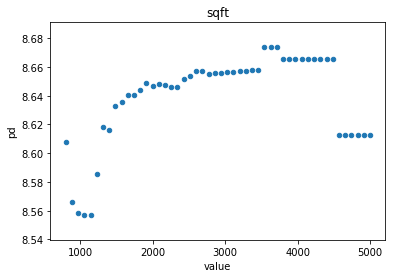

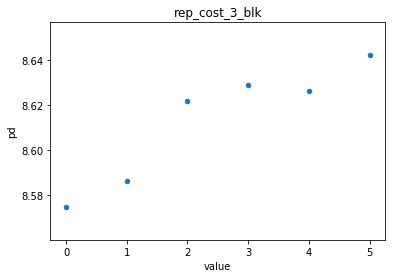

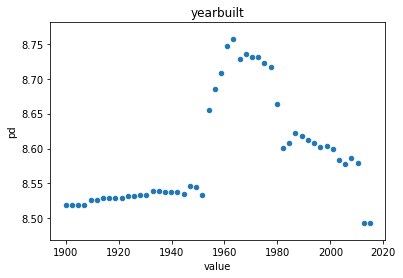

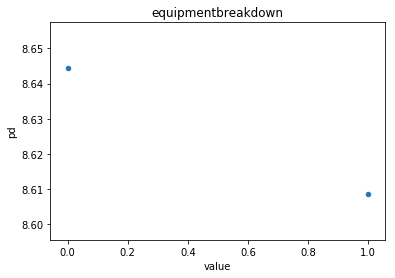

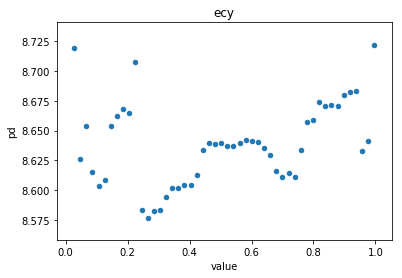

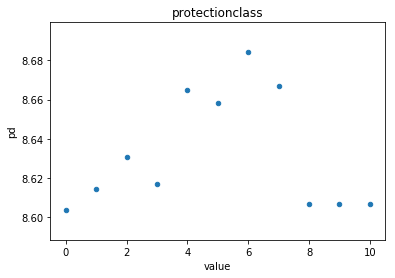

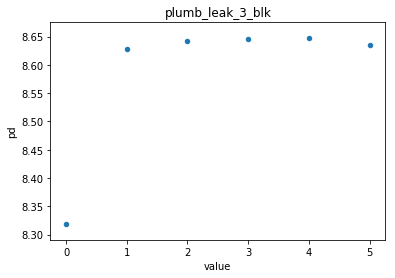

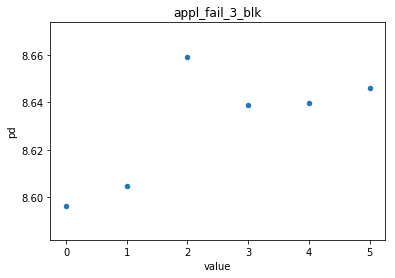

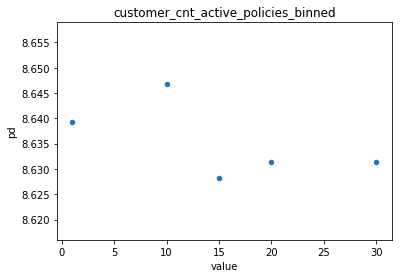

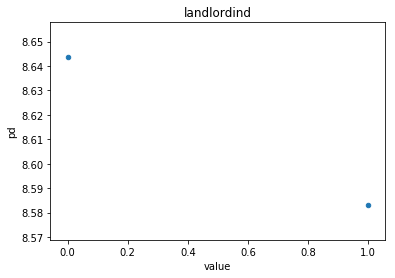

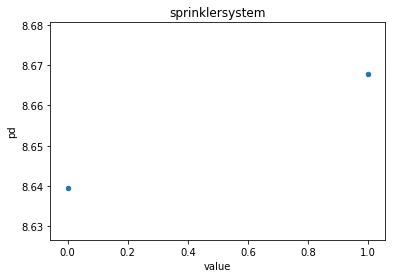

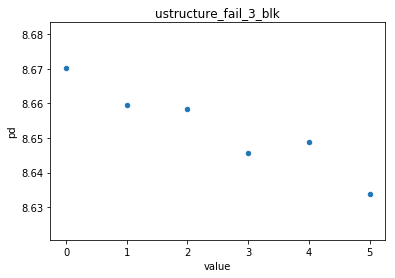

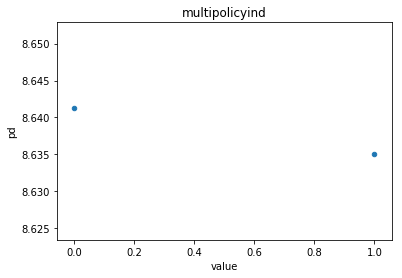

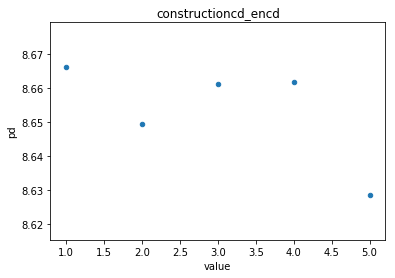

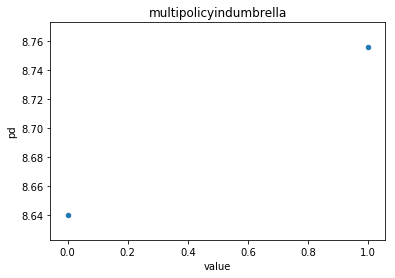

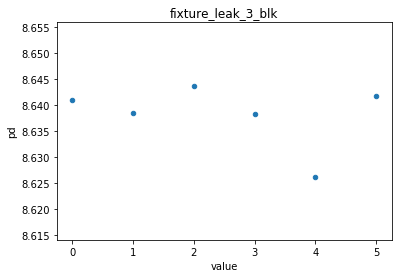

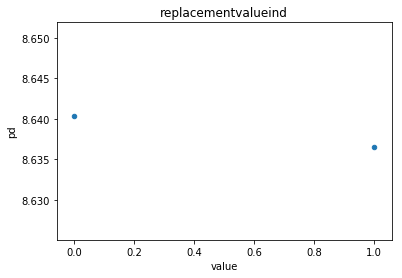

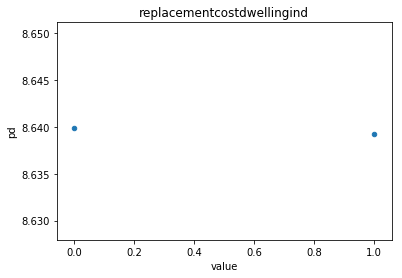

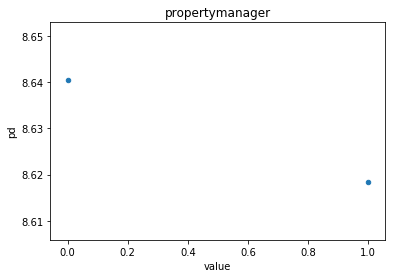

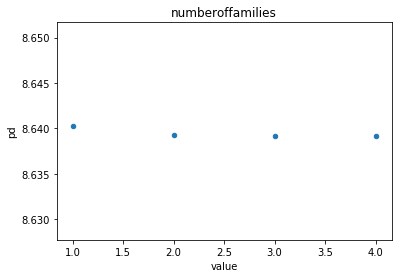

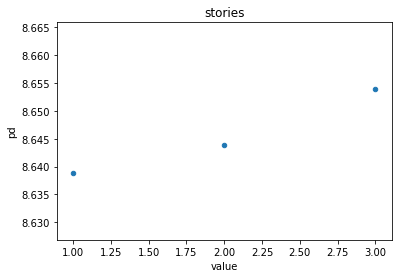

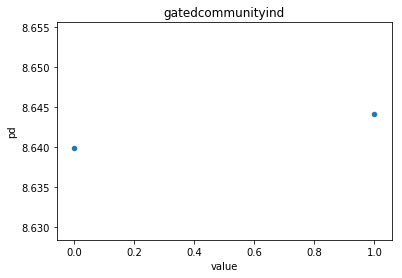

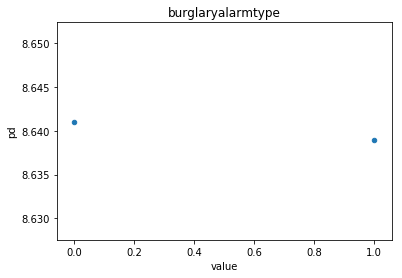

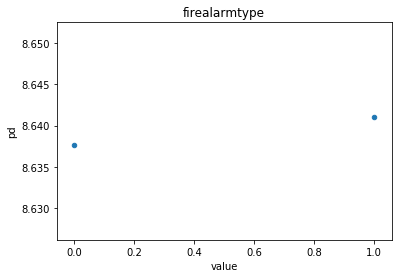

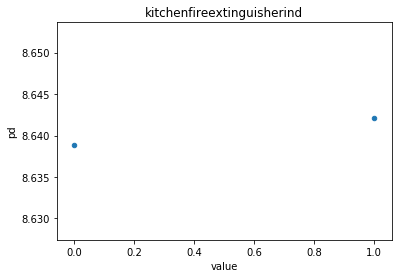

In [26]:
for f in pd_features:
    all_fm_pd[all_fm_pd['feature']==f].plot(kind='scatter',x='value', y='pd', title=f)

In [27]:
for f in pd_features:
    print(all_fm_pd[all_fm_pd['feature']==f])

     value        pd   feature
0      0.0  8.640839  waterded
1   5000.0  8.544082  waterded
2   7500.0  8.540621  waterded
3  10000.0  8.534369  waterded
     value        pd          feature
0   1000.0  8.639799  cova_deductible
1    500.0  8.578134  cova_deductible
2    250.0  8.577389  cova_deductible
3   2500.0  8.743769  cova_deductible
4    100.0  8.566307  cova_deductible
5   5000.0  9.011680  cova_deductible
6  10000.0  9.011680  cova_deductible
7   2000.0  8.724646  cova_deductible
8   7500.0  9.011680  cova_deductible
   value        pd                feature
0    0.0  8.640263  earthquakeumbrellaind
1    1.0  8.631176  earthquakeumbrellaind
   value        pd      feature
0    1.0  8.652307  deadboltind
1    0.0  8.614455  deadboltind
    value        pd                feature
0     0.0  8.630379  fire_risk_model_score
1     2.0  8.735846  fire_risk_model_score
2     1.0  8.640746  fire_risk_model_score
3     4.0  8.743640  fire_risk_model_score
4    -1.0  8.623397  fire_ri